In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

In [234]:
crime = pd.read_csv("Police_Department_Incident_Reports__2018_to_Present.csv")
crime = crime[(crime['Latitude'] >= 37.76) & (crime['Latitude'] <= 37.80)
              & (crime['Longitude'] >= -122.44) & (crime['Longitude'] <= -122.38)]

In [235]:
catData = crime['Incident Category'].value_counts().rename('catCount').to_frame().reset_index()
catData['level'] = [3,4,0,5,1,0,5,1,1,2,5,2,2,2,2,1,1,2,0,0,5,2,5,2,2,2,4,2,5,0,0,3,5,0,0,4,5,0,0,5,4,2,5,0,2,3]
level = catData['level']
category = catData['index']

In [236]:
def getLevel(a):
    return level[a == category].iloc[0]
crime['level'] = list(map(getLevel, crime['Incident Category']))

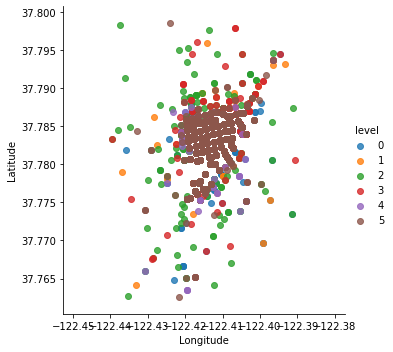

In [237]:
lm = sns.lmplot(x = 'Longitude', y = 'Latitude', hue = 'level', data = crime, fit_reg = False)

In [238]:
from sklearn.model_selection import train_test_split
X = crime[['Latitude', 'Longitude']]
y = crime['level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [240]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=60)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=60, p=2,
                     weights='uniform')

In [241]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[403 182  40 241 173 120]
 [361 157  45 205 135  81]
 [261 126  23 150 104  68]
 [360 172  46 208 138 105]
 [238 111  20 128  89  68]
 [321 162  34 212 115  83]]
              precision    recall  f1-score   support

           0       0.21      0.35      0.26      1159
           1       0.17      0.16      0.17       984
           2       0.11      0.03      0.05       732
           3       0.18      0.20      0.19      1029
           4       0.12      0.14      0.13       654
           5       0.16      0.09      0.11       927

    accuracy                           0.18      5485
   macro avg       0.16      0.16      0.15      5485
weighted avg       0.16      0.18      0.16      5485



In [242]:
y_pred = classifier.predict(X_test)

In [244]:
predData = pd.DataFrame({
    'Longitude': X_test['Longitude'],
    'Latitude': X_test['Latitude'],
    'y_test': y_test,
    'y_pred': y_pred
})

In [245]:
predData

,Longitude,Latitude,y_test,y_pred
15831,-122.405831,37.785744,1,3
7225,-122.414054,37.782794,5,0
18328,-122.412595,37.783933,1,1
15934,-122.408493,37.784453,1,3
5551,-122.413676,37.780927,3,0
...,...,...,...,...
8658,-122.415694,37.782585,4,4
19469,-122.416009,37.777773,0,0
736,-122.409245,37.781398,3,0
18839,-122.410952,37.784141,5,1


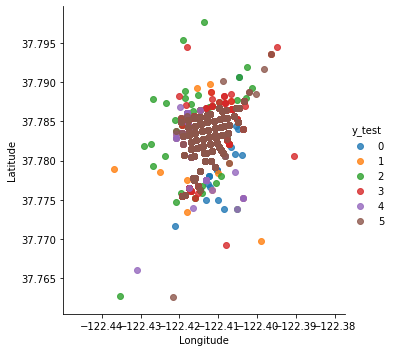

In [248]:
lm = sns.lmplot(x = 'Longitude', y = 'Latitude', hue = 'y_test', data = predData, fit_reg = False)

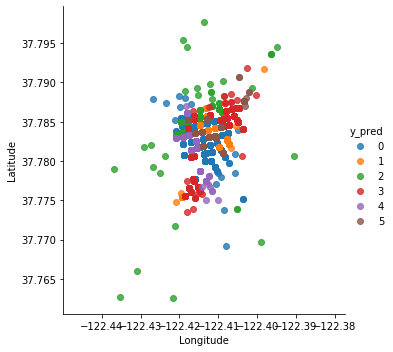

In [246]:
lm = sns.lmplot(x = 'Longitude', y = 'Latitude', hue = 'y_pred', data = predData,fit_reg = False)


In [249]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

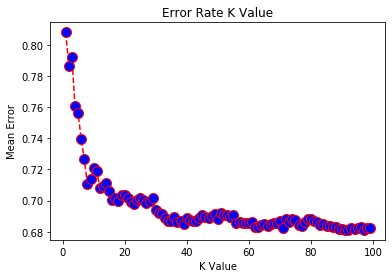

In [250]:
# plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')